# <center>Analysis of DART impact simulations</center>

## 0) Imports

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import os
import h5py
from betafactor import betafactor

%load_ext nb_black
%matplotlib inline
plt.rcParams["figure.dpi"] = 100
pd.set_option("display.precision", 2)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## 1) Beta factor:

In [2]:
project_path = "/scratch/rutz/DidymoonImpact"
folder_name = "binac_por_str"

filelist = sorted(os.listdir(f"{project_path}/data/{folder_name}/"))[::2]
files = [
    f"{project_path}/data/{folder_name}/{file}/impact_{file}.0300.h5"
    for file in filelist
]
files

['/scratch/rutz/DidymoonImpact/data/binac_por_str/por0_str1e3_ang0/impact_por0_str1e3_ang0.0300.h5',
 '/scratch/rutz/DidymoonImpact/data/binac_por_str/por0_str1e4_ang0/impact_por0_str1e4_ang0.0300.h5',
 '/scratch/rutz/DidymoonImpact/data/binac_por_str/por0_str1e5_ang0/impact_por0_str1e5_ang0.0300.h5',
 '/scratch/rutz/DidymoonImpact/data/binac_por_str/por0_str1e6_ang0/impact_por0_str1e6_ang0.0300.h5',
 '/scratch/rutz/DidymoonImpact/data/binac_por_str/por17_str1e3_ang0/impact_por17_str1e3_ang0.0300.h5',
 '/scratch/rutz/DidymoonImpact/data/binac_por_str/por17_str1e4_ang0/impact_por17_str1e4_ang0.0300.h5',
 '/scratch/rutz/DidymoonImpact/data/binac_por_str/por17_str1e5_ang0/impact_por17_str1e5_ang0.0300.h5',
 '/scratch/rutz/DidymoonImpact/data/binac_por_str/por17_str1e6_ang0/impact_por17_str1e6_ang0.0300.h5',
 '/scratch/rutz/DidymoonImpact/data/binac_por_str/por33_str1e3_ang0/impact_por33_str1e3_ang0.0300.h5',
 '/scratch/rutz/DidymoonImpact/data/binac_por_str/por33_str1e4_ang0/impact_por33_

<IPython.core.display.Javascript object>

In [3]:
ejecta_thresh = 1
betas = {}
for i, file in enumerate(files):
    betas[file.split("impact_")[1].split(".")[0]] = betafactor(file, ejecta_thresh)

<IPython.core.display.Javascript object>

In [14]:
strengths_plot = []
for i, strength in enumerate(["1e3", "1e4", "1e5", "1e6"]):
    strengths_plot.append([value for key, value in betas.items() if strength in key])

porosities_plot = [0, 17, 33, 50]

<IPython.core.display.Javascript object>

#### Plot

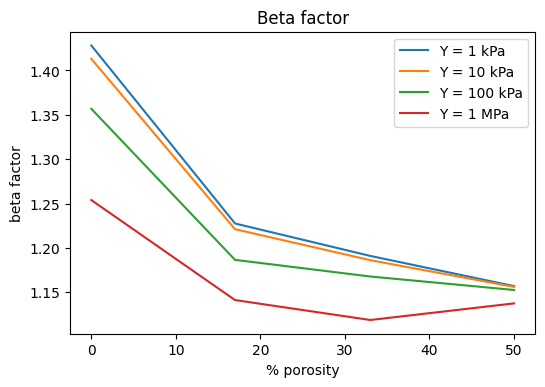

<IPython.core.display.Javascript object>

In [16]:
fig, ax = plt.subplots()
ax.plot(porosities_plot, strengths_plot[0], label=f"Y = 1 kPa")
ax.plot(porosities_plot, strengths_plot[1], label=f"Y = 10 kPa")
ax.plot(porosities_plot, strengths_plot[2], label=f"Y = 100 kPa")
ax.plot(porosities_plot, strengths_plot[3], label=f"Y = 1 MPa")
ax.set_title("Beta factor")
ax.set_ylabel("beta factor")
ax.set_xlabel("% porosity")
plt.legend()
fig.savefig("../MasterThesis/images/beta_results.pdf")